In [4]:
import pandas as pd
import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics
from keras import callbacks 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
from scipy.stats import norm
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import OneClassSVM
from sklearn import metrics

import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt


In [6]:
df = pd.read_pickle('stocksandindicators.pickle')
df_x = pd.DataFrame()
df_x = df['AAPL']
df_x['Volume'].fillna(value=0, inplace=True)
df_x['volume_fi'].fillna(value=0, inplace=True)

df_x['Open'].fillna(method='ffill', inplace=True)
df_x['High'].fillna(method='ffill', inplace=True)
df_x['Low'].fillna(method='ffill', inplace=True)
df_x['Close'].fillna(method='ffill', inplace=True)
df_x['Close_lag'] = df_x['Close'].shift(0)

df_x.set_index('Dates', inplace=True)


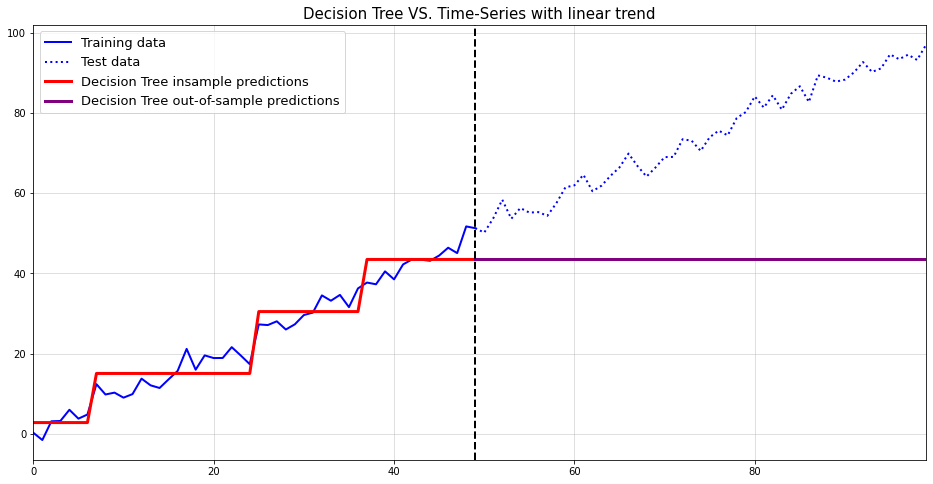

In [7]:
X = df_x.loc[:, (df_x.columns != 'Close') & (df_x.columns != 'Close_lag')]
y = df_x['Close_lag']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.05, random_state=642,shuffle=False)

t = np.arange(100)
y = t + 2 * np.random.normal(size = 100)#linear trend

t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)
t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)

y_train = y[:50]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(t_train, y_train)

y_pred_train = tree.predict(t_train)
y_pred_test = tree.predict(t_test)

plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1), y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with linear trend", fontsize=15)

plt.margins(x=0)


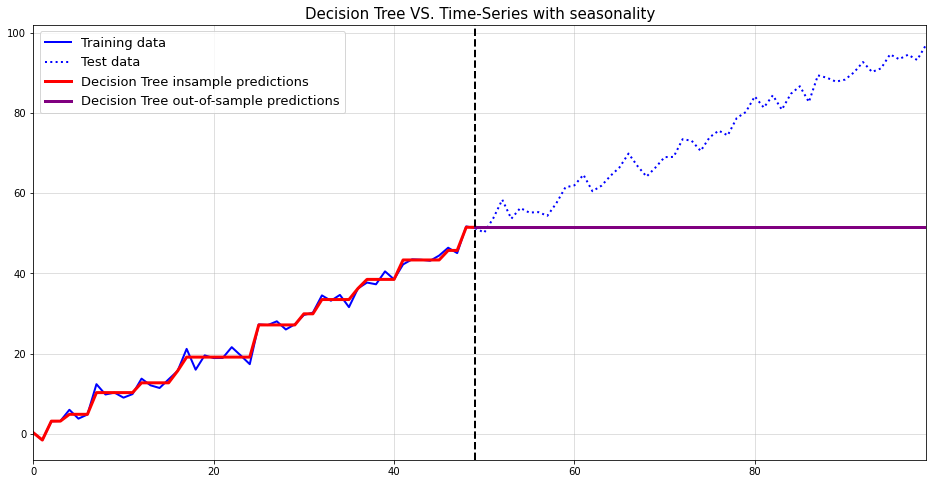

In [8]:

tree = DecisionTreeRegressor(max_depth = 4)
tree.fit(t_train, y_train)

y_pred_train = tree.predict(t_train)
y_pred_test = tree.predict(t_test)

plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1), y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with seasonality", fontsize=15)

plt.margins(x=0)


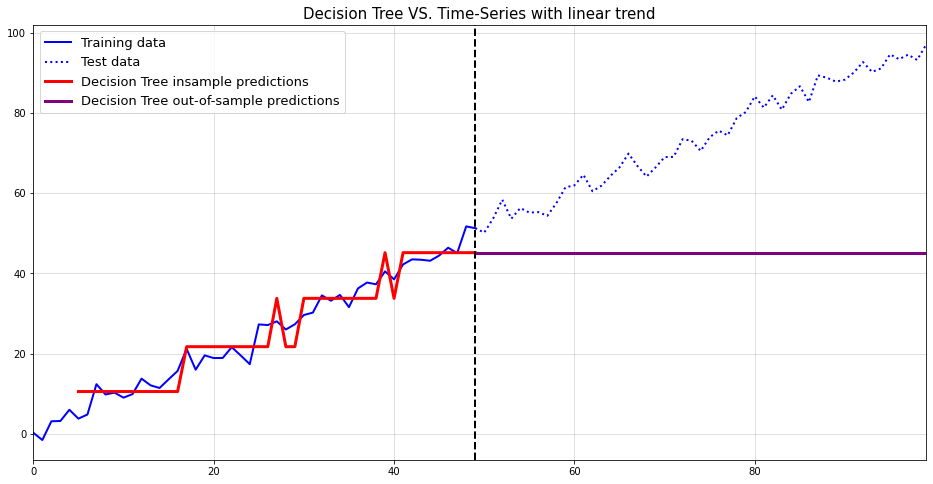

In [9]:
y_train = y[:50]
X_train_shift = np.concatenate([pd.Series(y_train).shift(t).values.reshape(-1,1) for t in range(1,6)],1)[5:,:]
y_train_shift = y_train[5:]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 2)
tree.fit(X_train_shift, y_train_shift)

y_pred_train = tree.predict(X_train_shift).reshape(-1)

Xt = np.concatenate([X_train_shift[-1,1:].reshape(1,-1),np.array(y_train_shift[-1]).reshape(1,1)],1)
predictions_test = []

for t in range(len(y_test)):
    pred = tree.predict(Xt)
    predictions_test.append(pred[0])
    Xt = np.concatenate([Xt[-1,1:].reshape(1,-1),np.array(pred).reshape(1,1)],1)
    
y_pred_test = np.array(predictions_test)


plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1)[5:], y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with linear trend", fontsize=15)

plt.margins(x=0)

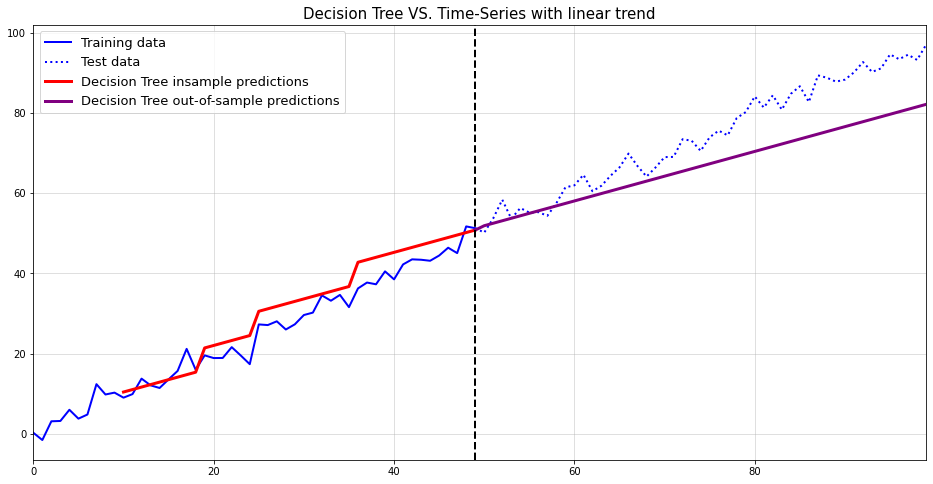

In [11]:
np.random.seed(123)
t = np.arange(100)
t_train = t[:50].reshape(-1,1)
t_test = t[50:].reshape(-1,1)

n_lags = 10

y_train = y[:50]
X_train_shift = pd.concat([pd.DataFrame(y_train).shift(t) for t in range(1,n_lags)],1).diff().values[n_lags:,:]
y_train_shift = np.diff(y_train)[n_lags-1:]
y_test = y[50:]

tree = DecisionTreeRegressor(max_depth = 1)
tree.fit(X_train_shift, y_train_shift)

y_pred_train = tree.predict(X_train_shift).reshape(-1)

Xt = np.concatenate([X_train_shift[-1,1:].reshape(1,-1),np.array(y_train_shift[-1]).reshape(1,1)],1)
predictions_test = []

for t in range(len(y_test)):
    pred = tree.predict(Xt)
    predictions_test.append(pred[0])
    Xt = np.concatenate([np.array(pred).reshape(1,1),Xt[-1,1:].reshape(1,-1)],1)
    
y_pred_test = np.array(predictions_test)

y_pred_train = y_train[n_lags-2]+np.cumsum(y_pred_train)
y_pred_test = y_train[-1]+np.cumsum(y_pred_test)



plt.figure(figsize = (16,8))
plt.plot(t_train.reshape(-1), y_train, label = "Training data", color="blue", lw=2)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_train[-1]],y_test]), label = "Test data", 
         color="blue", ls = "dotted", lw=2)


plt.plot(t_train.reshape(-1)[n_lags:], y_pred_train, label = "Decision Tree insample predictions", 
         color="red", lw = 3)
plt.plot(np.concatenate([np.array(t_train[-1]),t_test.reshape(-1)]), 
         np.concatenate([[y_pred_train[-1]],y_pred_test]), label = "Decision Tree out-of-sample predictions", 
         color="purple", lw=3)

plt.grid(alpha = 0.5)
plt.axvline(t_train[-1], color="black", lw=2, ls="dashed")
plt.legend(fontsize=13)
plt.title("Decision Tree VS. Time-Series with linear trend", fontsize=15)

plt.margins(x=0)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from copy import deepcopy


class RandomForestARModel():
    """
    Autoregressive forecasting with Random Forests
    """
    
    def __init__(self, n_lags=1, max_depth = 3, n_estimators=1000, random_state = 123,
                 log_transform = False, first_differences = False, seasonal_differences = None):
        """
        Args:
            n_lags: Number of lagged features to consider in autoregressive model
            max_depth: Max depth for the forest's regression trees
            random_state: Random state to pass to random forest
            
            log_transform: Whether the input should be log-transformed
            first_differences: Whether the input should be singly differenced
            seasonal_differences: Seasonality to consider, if 'None' then no seasonality is presumed
        """
        
        self.n_lags = n_lags
        self.model = RandomForestRegressor(max_depth = max_depth, n_estimators = n_estimators, random_state = random_state)
        
        self.log_transform = log_transform
        self.first_differences = first_differences
        self.seasonal_differences = seasonal_differences
        
        
        
    def fit(self, y):
        """
        Args:
            y: training data (numpy array or pandas series/dataframe)
        """
        #enable pandas functions via dataframes
        y_df = pd.DataFrame(y)
        self.y_df = deepcopy(y_df)
        
        #apply transformations and store results for retransformations
        if self.log_transform:
            y_df = np.log(y_df)
            self.y_logged = deepcopy(y_df)
        
        if self.first_differences:
            y_df = y_df.diff().dropna()
            self.y_diffed = deepcopy(y_df)
        
        if self.seasonal_differences is not None:
            y_df = y_df.diff(self.seasonal_differences).dropna()
            self.y_diffed_seasonal = deepcopy(y_df)
        
        
        #get lagged features
        Xtrain = pd.concat([y_df.shift(t) for t in range(1,self.n_lags+1)],axis=1).dropna()
        self.Xtrain = Xtrain
        
        ytrain = y_df.loc[Xtrain.index,:]
        self.ytrain = ytrain

        self.model.fit(Xtrain.values,ytrain.values.reshape(-1))

    
    
    def sample_forecast(self, n_periods = 1, n_samples = 10000, random_seed =123):
        """
        Draw forecasting samples by randomly drawing from all trees in the forest per forecast period
        Args:
            n_periods: Ammount of periods to forecast
            n_samples: Number of samples to draw
            random_seed: Random seed for numpy
        """
        samples = self._perform_forecast(n_periods, n_samples, random_seed)
        output = self._retransform_forecast(samples, n_periods)
        
        return output
    
    
    
    def _perform_forecast(self, n_periods, n_samples, random_seed):
        """
        Forecast transformed observations
        Args:
            n_periods: Ammount of periods to forecast
            n_samples: Number of samples to draw
            random_seed: Random seed for numpy
        """
        samples = []
        
        np.random.seed(random_seed)
        for i in range(n_samples):
            #store lagged features for each period
            Xf = np.concatenate([self.Xtrain.iloc[-1,1:].values.reshape(1,-1),
                                 self.ytrain.iloc[-1].values.reshape(1,1)],1)

            forecasts = []

            for t in range(n_periods):
                tree = self.model.estimators_[np.random.randint(len(self.model.estimators_))]
                pred = tree.predict(Xf)[0]
                forecasts.append(pred)
                
                #update lagged features for next period
                Xf = np.concatenate([Xf[:,1:],np.array([[pred]])],1)
            
            samples.append(forecasts)
        
        return samples
    
    
    
    def _retransform_forecast(self, samples, n_periods):
        """
        Retransform forecast (re-difference and exponentiate)
        Args:
            samples: Forecast samples for retransformation
            n_periods: Ammount of periods to forecast
        """
        
        full_sample_tree = []

        for samp in samples:
            draw = np.array(samp)
            
            #retransform seasonal differencing
            if self.seasonal_differences is not None:
                result = list(self.y_diffed.iloc[-self.seasonal_differences:].values)
                for t in range(n_periods):
                    result.append(result[t]+draw[t])
                result = result[self.seasonal_differences:]
            else:
                result = []
                for t in range(n_periods):
                    result.append(draw[t])
            
            #retransform first differences
            y_for_add = self.y_logged.values[-1] if self.log_transform else self.y_df.values[-1]
            
            if self.first_differences:
                result = y_for_add + np.cumsum(result)
            
            #retransform log transformation
            if self.log_transform:
                result = np.exp(result)
            
            full_sample_tree.append(result.reshape(-1,1))

        return np.concatenate(full_sample_tree,1)


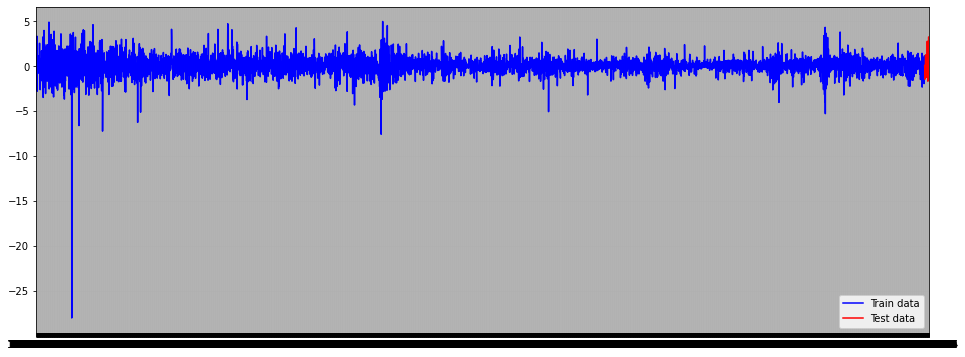

In [16]:


data = df_x
returns = np.log(data["Close"]).diff().dropna()

n_test = 30

train = returns.iloc[:-n_test]

train_mean = train.mean()
train_std = train.std()

train = (train-train_mean)/train_std

test = returns.iloc[-n_test:]
test = (test-train_mean)/train_std

plt.figure(figsize = (16,6))
plt.plot(train, color = "blue", label = "Train data")
plt.plot(test, color = "red", label = "Test data")
plt.grid(alpha = 0.5)
plt.margins(x=0)
plt.legend()

